# Part A

In [1]:
import numpy as np

data = np.genfromtxt('dataset1.csv', delimiter=',')

In [2]:
print(f"Number of rows: {len(data)}")
print(f"Shape of array (rows, columns): {data.shape}")

Number of rows: 1000
Shape of array (rows, columns): (1000, 2)


In [3]:
means = np.mean(data, axis=0)
print("Mean of each column:")
print(means)

Mean of each column:
[1.500568   1.49939359]


In [4]:
data

array([[2.06031874, 2.31662042],
       [3.42607063, 2.28227718],
       [3.46444152, 0.71631786],
       ...,
       [1.07821154, 1.03076394],
       [0.94100354, 0.95712182],
       [2.95546409, 0.43090975]], shape=(1000, 2))

In [5]:
data - means

array([[ 0.55975073,  0.81722683],
       [ 1.92550263,  0.78288359],
       [ 1.96387352, -0.78307573],
       ...,
       [-0.42235646, -0.46862965],
       [-0.55956446, -0.54227178],
       [ 1.45489608, -1.06848384]], shape=(1000, 2))

In [6]:
# Covariance Matrix
cov_matrix = np.zeros((data.shape[1], data.shape[1]))
for i in range(data.shape[0]):
    cov_matrix += np.outer(data[i] - means, data[i] - means)
cov_matrix /= data.shape[0]

In [7]:
cov_matrix

array([[1.23082127, 0.38386275],
       [0.38386275, 1.26532787]])

In [8]:
# Calculate eigenvalues and eigenvectors
eigen_values, eigen_vectors = np.linalg.eigh(cov_matrix)

print("Eigenvalues:")
print(eigen_values)
print("\nEigenvectors:")
print(eigen_vectors)

Eigenvalues:
[0.86382428 1.63232486]

Eigenvectors:
[[-0.72280745  0.69104949]
 [ 0.69104949  0.72280745]]


In [9]:
std_dev = np.std(data, axis=0)
print("\nStandard deviation of each column:")
print(std_dev)


Standard deviation of each column:
[1.10942384 1.12486793]


In [10]:
print("Total Variance in the dataset", np.sum(std_dev**2))

Total Variance in the dataset 2.496149136474073


In [11]:
assert np.sum(eigen_values) == np.sum(std_dev**2), "Sum of eigenvalues does not equal total variance"

In [12]:
print(np.max(eigen_values)*100/(np.sum(eigen_values)), "% of variance explained by the first principal component.", sep='')
print(np.min(eigen_values)*100/(np.sum(eigen_values)), "% of variance explained by the second principal component.", sep='')

65.39372320415248% of variance explained by the first principal component.
34.606276795847535% of variance explained by the second principal component.


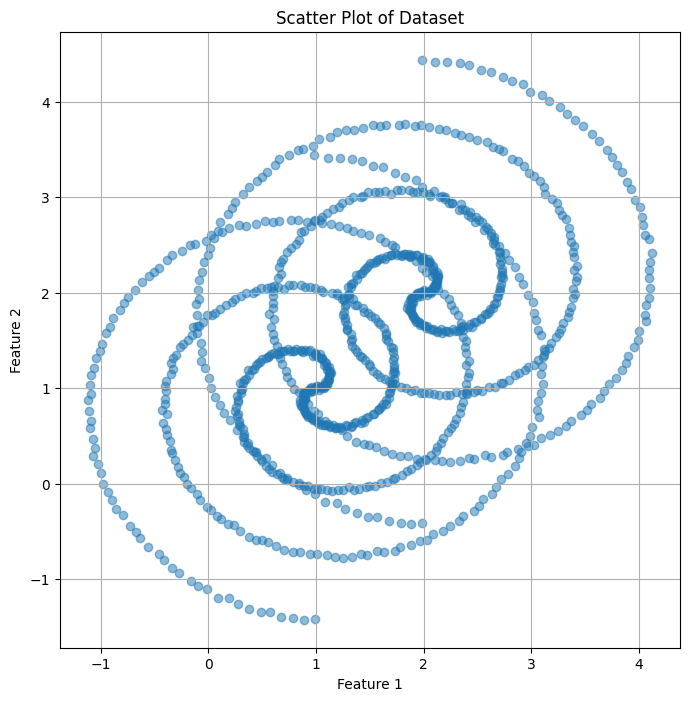

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(data[:, 0], data[:, 1], alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Dataset')
plt.grid(True)
plt.show()

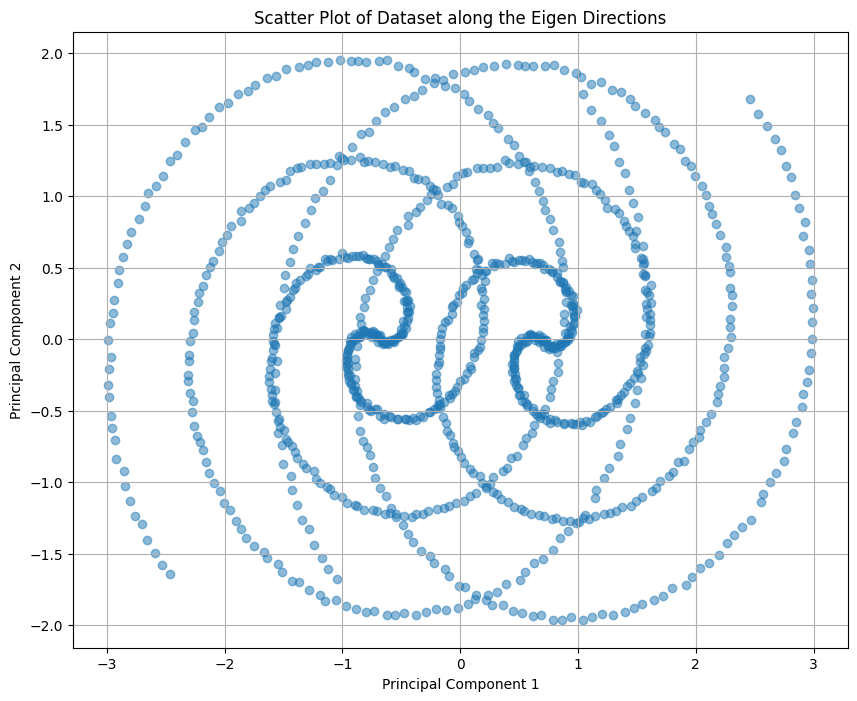

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(np.matmul(data-means, eigen_vectors[:,-1]), np.matmul(data-means, eigen_vectors[:,-2]), alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Dataset along the Eigen Directions')
plt.grid(True)
plt.show()

# Part B: Kernel-PCA

## $kernel(x, x') = (x^T \cdot x' + 1)^2$

In [15]:
kernel_matrix = np.zeros((data.shape[0], data.shape[0]))
for i in range(data.shape[0]):
    for j in range(i, data.shape[0]):
        kernel_matrix[i, j] = (np.dot(data[i], data[j]) + 1) ** 2
        kernel_matrix[j, i] = kernel_matrix[i, j]

In [16]:
centered_kernel_matrix = kernel_matrix - np.mean(kernel_matrix, axis=0) - np.mean(kernel_matrix, axis=1)[:, np.newaxis] + np.mean(kernel_matrix)

In [17]:
# Calculate eigenvalues and eigenvectors
eigen_values, eigen_vectors = np.linalg.eigh(centered_kernel_matrix)

print("Eigenvalues:")
print(eigen_values)
print("\nEigenvectors:")
print(eigen_vectors)

Eigenvalues:
[-5.28808361e-11 -1.38292650e-11 -1.20075789e-11 -1.12472976e-11
 -7.04065524e-12 -6.60576642e-12 -5.64396358e-12 -5.18869696e-12
 -5.16793924e-12 -4.64463537e-12 -3.96090482e-12 -3.58906847e-12
 -3.17397672e-12 -3.09583572e-12 -3.05524991e-12 -2.91808777e-12
 -2.84157994e-12 -2.60887095e-12 -2.55380946e-12 -2.44118369e-12
 -2.25584574e-12 -2.22452365e-12 -2.22341863e-12 -2.05167659e-12
 -1.99418881e-12 -1.97470541e-12 -1.97442366e-12 -1.95104687e-12
 -1.84548851e-12 -1.82830416e-12 -1.76013720e-12 -1.74160178e-12
 -1.67141927e-12 -1.67009708e-12 -1.64295375e-12 -1.61917829e-12
 -1.57696085e-12 -1.54338245e-12 -1.49062663e-12 -1.48764981e-12
 -1.47421261e-12 -1.43211862e-12 -1.43127038e-12 -1.42583458e-12
 -1.37458417e-12 -1.33401773e-12 -1.28705790e-12 -1.27462243e-12
 -1.24968222e-12 -1.24689423e-12 -1.23547152e-12 -1.22713004e-12
 -1.15269063e-12 -1.14996648e-12 -1.14975006e-12 -1.12712924e-12
 -1.10837451e-12 -1.09744841e-12 -1.09023113e-12 -1.08362546e-12
 -1.07505004

In [18]:
eigen_values[::-1]

array([ 3.67143350e+04,  1.18008811e+04,  1.14385740e+03,  4.19822456e+02,
        3.68509636e+02,  5.01486064e-11,  1.21859043e-11,  9.24781841e-12,
        7.46751721e-12,  6.32216320e-12,  5.19815563e-12,  4.28031574e-12,
        3.81176906e-12,  3.69517999e-12,  3.62617532e-12,  3.51086319e-12,
        3.05191000e-12,  3.04384145e-12,  2.74502424e-12,  2.71870655e-12,
        2.61995488e-12,  2.45078570e-12,  2.42129306e-12,  2.31967994e-12,
        2.03691683e-12,  1.97993045e-12,  1.96629964e-12,  1.92991961e-12,
        1.86246915e-12,  1.81845008e-12,  1.77895347e-12,  1.74117650e-12,
        1.66916671e-12,  1.64974889e-12,  1.60355490e-12,  1.48677339e-12,
        1.44968683e-12,  1.43884855e-12,  1.40364058e-12,  1.36011572e-12,
        1.33550619e-12,  1.33051290e-12,  1.32533480e-12,  1.28730303e-12,
        1.22211212e-12,  1.17224630e-12,  1.16256268e-12,  1.16182568e-12,
        1.15538425e-12,  1.11716758e-12,  1.10965236e-12,  1.09580699e-12,
        1.05310631e-12,  

In [19]:
np.max(np.abs(eigen_values[:-5]))

np.float64(5.2880836144104654e-11)

In [20]:
alpha_1 = eigen_vectors[:,-1]/np.sqrt(data.shape[0]*eigen_values[-1])
alpha_2 = eigen_vectors[:,-2]/np.sqrt(data.shape[0]*eigen_values[-2])

In [21]:
x = np.dot(centered_kernel_matrix, alpha_1)
y = np.dot(centered_kernel_matrix, alpha_2)

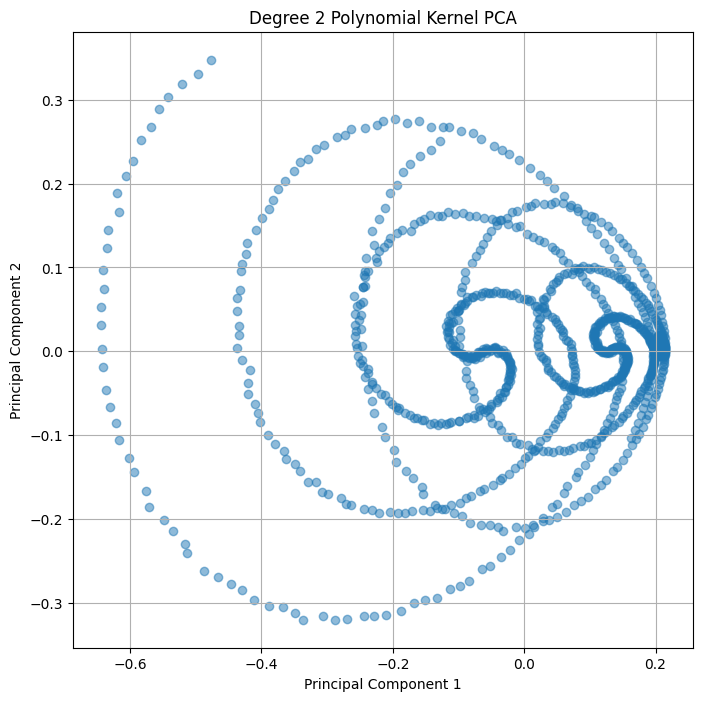

In [22]:
plt.figure(figsize=(8, 8))
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Degree 2 Polynomial Kernel PCA')
plt.grid(True)
plt.show()

In [23]:
print(np.sum(eigen_values[-2:])/np.sum(eigen_values[-5:])*100, "% of variance is explained by the first 2 principal components.", sep='')

96.16989322962556% of variance is explained by the first 2 principal components.


## $kernel(x, x') = (x^T \cdot x' + 1)^3$

In [24]:
kernel_matrix = np.zeros((data.shape[0], data.shape[0]))
for i in range(data.shape[0]):
    for j in range(i, data.shape[0]):
        kernel_matrix[i, j] = (np.dot(data[i], data[j]) + 1) ** 3
        kernel_matrix[j, i] = kernel_matrix[i, j]

In [25]:
centered_kernel_matrix = kernel_matrix - np.mean(kernel_matrix, axis=0) - np.mean(kernel_matrix, axis=1)[:, np.newaxis] + np.mean(kernel_matrix)

In [26]:
# Calculate eigenvalues and eigenvectors
eigen_values, eigen_vectors = np.linalg.eigh(centered_kernel_matrix)

print("Eigenvalues:")
print(eigen_values)
print("\nEigenvectors:")
print(eigen_vectors)

Eigenvalues:
[-6.91217704e-10 -2.01320470e-10 -1.70106922e-10 -1.47978462e-10
 -1.33287356e-10 -1.16793232e-10 -1.15960795e-10 -9.45870868e-11
 -7.25017714e-11 -6.93872294e-11 -6.44555840e-11 -6.04825458e-11
 -5.99890551e-11 -5.70597573e-11 -5.57446215e-11 -5.30655583e-11
 -5.25018306e-11 -4.84262367e-11 -4.77296118e-11 -4.71599273e-11
 -4.34884951e-11 -4.34308898e-11 -4.25167069e-11 -4.19355554e-11
 -3.96257277e-11 -3.67959175e-11 -3.66031608e-11 -3.62338956e-11
 -3.38935675e-11 -3.30640713e-11 -3.25513955e-11 -3.21987761e-11
 -3.19402854e-11 -3.05853554e-11 -3.03573807e-11 -2.99280731e-11
 -2.96507820e-11 -2.95856353e-11 -2.95508309e-11 -2.81556019e-11
 -2.77600307e-11 -2.72634778e-11 -2.70835121e-11 -2.64930861e-11
 -2.60423174e-11 -2.39744850e-11 -2.38053480e-11 -2.30000039e-11
 -2.28760619e-11 -2.28581501e-11 -2.25484922e-11 -2.24555706e-11
 -2.22732815e-11 -2.19455136e-11 -2.14099826e-11 -2.09618189e-11
 -2.07346428e-11 -2.03494975e-11 -1.99009074e-11 -1.85702956e-11
 -1.82803211

In [27]:
eigen_values[::-1]

array([ 8.18343466e+05,  2.09834025e+05,  2.37090762e+04,  5.42478961e+03,
        4.70517512e+03,  7.95093815e+02,  6.28672813e+02,  2.50956467e+02,
        2.00276187e+02,  5.52982434e-10,  1.86265439e-10,  1.31691451e-10,
        1.16321813e-10,  9.78342953e-11,  9.29788534e-11,  8.80491785e-11,
        8.01585180e-11,  7.49233798e-11,  7.10828020e-11,  6.79308743e-11,
        5.96956481e-11,  5.39300630e-11,  5.36215628e-11,  5.20408075e-11,
        4.99068371e-11,  4.94363196e-11,  4.36362373e-11,  4.30847439e-11,
        4.21267551e-11,  4.01976195e-11,  3.85056323e-11,  3.79012260e-11,
        3.71176302e-11,  3.41103676e-11,  3.32470601e-11,  3.25709072e-11,
        3.18422294e-11,  3.10917846e-11,  2.94309320e-11,  2.91941332e-11,
        2.91514442e-11,  2.90270834e-11,  2.87031614e-11,  2.77160358e-11,
        2.71013688e-11,  2.65117308e-11,  2.53346201e-11,  2.45279523e-11,
        2.43773355e-11,  2.38317645e-11,  2.37789228e-11,  2.35518257e-11,
        2.20616295e-11,  

In [28]:
np.max(np.abs(eigen_values[:-9]))

np.float64(6.912177037028321e-10)

In [29]:
alpha_1 = eigen_vectors[:,-1]/np.sqrt(data.shape[0]*eigen_values[-1])
alpha_2 = eigen_vectors[:,-2]/np.sqrt(data.shape[0]*eigen_values[-2])

In [30]:
x = np.dot(centered_kernel_matrix, alpha_1)
y = np.dot(centered_kernel_matrix, alpha_2)

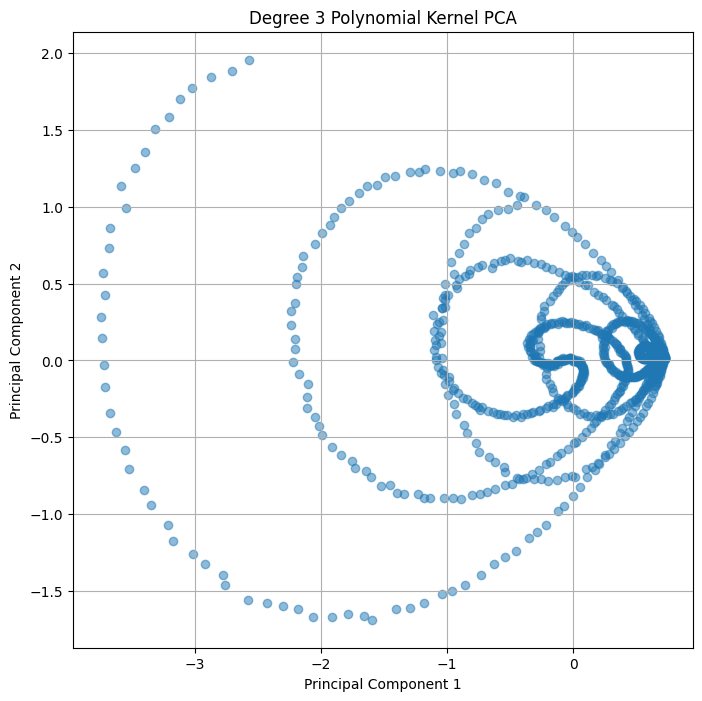

In [31]:
plt.figure(figsize=(8, 8))
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Degree 3 Polynomial Kernel PCA')
plt.grid(True)
plt.show()

In [32]:
print(np.sum(eigen_values[-2:])/np.sum(eigen_values[-9:])*100, "% of variance is explained by the first 2 principal components.", sep='')

96.64307505341831% of variance is explained by the first 2 principal components.


## Radial Basis Function - Kernel 
## $kernel(x, x') = e^{|x-x'|^2/(2*\sigma^2)}$

### sigma = 1

In [33]:
sigma = 1.0

kernel_matrix = np.zeros((data.shape[0], data.shape[0]))
for i in range(data.shape[0]):
    for j in range(i, data.shape[0]):
        dist = np.sum((data[i] - data[j])**2)
        kernel_matrix[i, j] = np.exp(-dist/(2*sigma**2))
        kernel_matrix[j, i] = kernel_matrix[i, j]

In [34]:
centered_kernel_matrix = kernel_matrix - np.mean(kernel_matrix, axis=0) - np.mean(kernel_matrix, axis=1)[:, np.newaxis] + np.mean(kernel_matrix)

In [35]:
# Calculate eigenvalues and eigenvectors
eigen_values, eigen_vectors = np.linalg.eigh(centered_kernel_matrix)

print("Eigenvalues:")
print(eigen_values)
print("\nEigenvectors:")
print(eigen_vectors)

Eigenvalues:
[-1.56513086e-13 -3.26800663e-14 -2.46038865e-14 -2.35399537e-14
 -1.77401316e-14 -1.76352533e-14 -1.65872081e-14 -1.52909965e-14
 -1.47064694e-14 -1.31775168e-14 -1.27699745e-14 -1.26120431e-14
 -1.18541423e-14 -1.03128399e-14 -9.95009031e-15 -9.88370478e-15
 -9.37034752e-15 -9.07437094e-15 -8.61577832e-15 -7.53122617e-15
 -7.29060658e-15 -7.04468778e-15 -6.48609256e-15 -6.34637605e-15
 -6.24244654e-15 -6.07705096e-15 -5.99863140e-15 -5.89277082e-15
 -5.80632488e-15 -5.77773456e-15 -5.71302898e-15 -5.48523128e-15
 -5.07035053e-15 -4.95389833e-15 -4.87872397e-15 -4.87583799e-15
 -4.74904113e-15 -4.52691161e-15 -4.45358387e-15 -4.35507813e-15
 -4.26687185e-15 -4.24144551e-15 -4.19942437e-15 -4.19421721e-15
 -4.14696511e-15 -4.10954151e-15 -4.05501619e-15 -3.89803144e-15
 -3.85096187e-15 -3.84550490e-15 -3.76116998e-15 -3.66444612e-15
 -3.62171804e-15 -3.58440826e-15 -3.57631876e-15 -3.54897563e-15
 -3.53528117e-15 -3.50191741e-15 -3.44305708e-15 -3.35667479e-15
 -3.27569669

In [36]:
eigen_values[::-1]

array([ 1.65490276e+02,  1.14368938e+02,  1.10448636e+02,  5.89362255e+01,
        5.58162286e+01,  3.85291982e+01,  2.82186138e+01,  2.44999052e+01,
        1.99225399e+01,  1.64305895e+01,  1.43263235e+01,  1.13922734e+01,
        8.27436670e+00,  7.68543589e+00,  6.81330420e+00,  5.25668754e+00,
        4.73413735e+00,  3.23720740e+00,  2.93536067e+00,  2.81226737e+00,
        2.16874286e+00,  1.94812617e+00,  1.33369466e+00,  1.02501194e+00,
        9.89983664e-01,  8.10817187e-01,  7.43353662e-01,  7.14757664e-01,
        4.75132011e-01,  3.73106848e-01,  3.37423390e-01,  3.07786920e-01,
        2.67331026e-01,  2.11066747e-01,  1.50223559e-01,  1.16190252e-01,
        1.01370716e-01,  9.74485255e-02,  9.55916615e-02,  8.76819863e-02,
        4.27228006e-02,  4.06991465e-02,  3.76777461e-02,  3.19638665e-02,
        2.70314596e-02,  2.46432349e-02,  1.67206553e-02,  1.20064430e-02,
        1.14332765e-02,  8.66016583e-03,  6.45904842e-03,  6.30919793e-03,
        6.06921158e-03,  

In [37]:
eigen_values[eigen_values<1e-12]=0
eigen_values[::-1]

array([1.65490276e+02, 1.14368938e+02, 1.10448636e+02, 5.89362255e+01,
       5.58162286e+01, 3.85291982e+01, 2.82186138e+01, 2.44999052e+01,
       1.99225399e+01, 1.64305895e+01, 1.43263235e+01, 1.13922734e+01,
       8.27436670e+00, 7.68543589e+00, 6.81330420e+00, 5.25668754e+00,
       4.73413735e+00, 3.23720740e+00, 2.93536067e+00, 2.81226737e+00,
       2.16874286e+00, 1.94812617e+00, 1.33369466e+00, 1.02501194e+00,
       9.89983664e-01, 8.10817187e-01, 7.43353662e-01, 7.14757664e-01,
       4.75132011e-01, 3.73106848e-01, 3.37423390e-01, 3.07786920e-01,
       2.67331026e-01, 2.11066747e-01, 1.50223559e-01, 1.16190252e-01,
       1.01370716e-01, 9.74485255e-02, 9.55916615e-02, 8.76819863e-02,
       4.27228006e-02, 4.06991465e-02, 3.76777461e-02, 3.19638665e-02,
       2.70314596e-02, 2.46432349e-02, 1.67206553e-02, 1.20064430e-02,
       1.14332765e-02, 8.66016583e-03, 6.45904842e-03, 6.30919793e-03,
       6.06921158e-03, 5.27569990e-03, 3.25531273e-03, 3.03421410e-03,
      

In [38]:
alpha_1 = eigen_vectors[:,-1]/np.sqrt(data.shape[0]*eigen_values[-1])
alpha_2 = eigen_vectors[:,-2]/np.sqrt(data.shape[0]*eigen_values[-2])

In [39]:
x = np.dot(centered_kernel_matrix, alpha_1)
y = np.dot(centered_kernel_matrix, alpha_2)

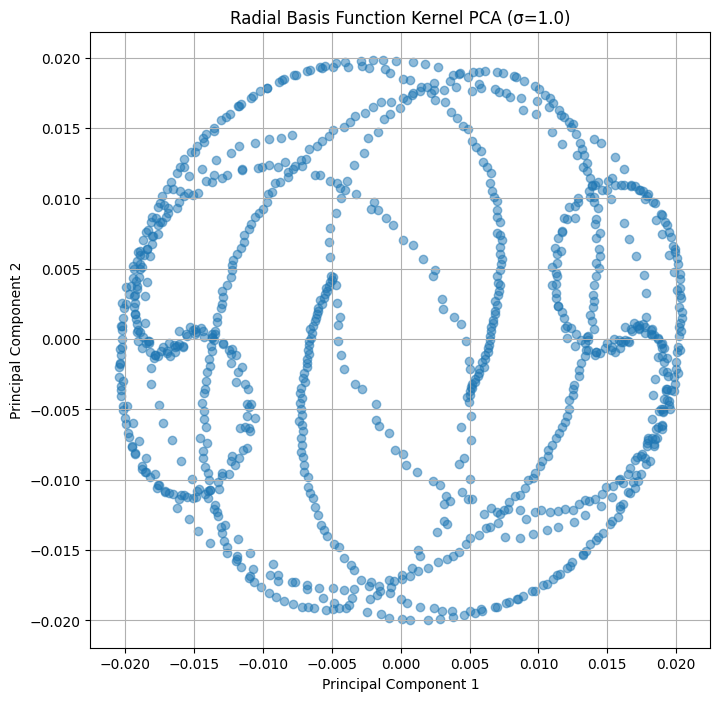

In [40]:
plt.figure(figsize=(8, 8))
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'Radial Basis Function Kernel PCA (σ={sigma})')
plt.grid(True)
plt.show()

In [41]:
print(np.sum(eigen_values[-2:])/np.sum(eigen_values)*100, "% of variance is explained by the first 2 principal components.", sep='')

39.2630110697391% of variance is explained by the first 2 principal components.


### sigma = .5

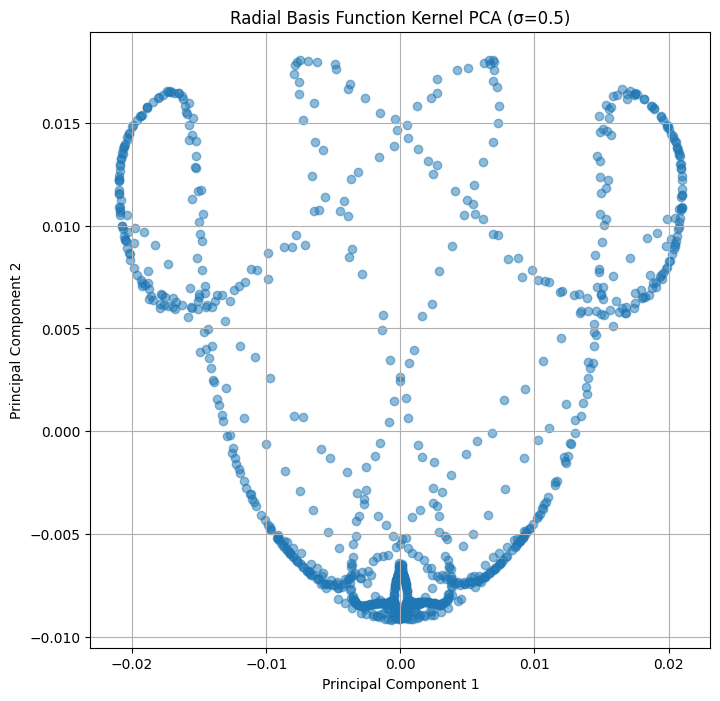

21.21853955196289% of variance is explained by the first 2 principal components.


In [42]:
sigma = .5

kernel_matrix = np.zeros((data.shape[0], data.shape[0]))
for i in range(data.shape[0]):
    for j in range(i, data.shape[0]):
        dist = np.sum((data[i] - data[j])**2)
        kernel_matrix[i, j] = np.exp(-dist/(2*sigma**2))
        kernel_matrix[j, i] = kernel_matrix[i, j]
centered_kernel_matrix = kernel_matrix - np.mean(kernel_matrix, axis=0) - np.mean(kernel_matrix, axis=1)[:, np.newaxis] + np.mean(kernel_matrix)
# Calculate eigenvalues and eigenvectors
eigen_values, eigen_vectors = np.linalg.eigh(centered_kernel_matrix)


eigen_values[eigen_values<1e-12]=0

alpha_1 = eigen_vectors[:,-1]/np.sqrt(data.shape[0]*eigen_values[-1])
alpha_2 = eigen_vectors[:,-2]/np.sqrt(data.shape[0]*eigen_values[-2])
x = np.dot(centered_kernel_matrix, alpha_1)
y = np.dot(centered_kernel_matrix, alpha_2)
plt.figure(figsize=(8, 8))
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'Radial Basis Function Kernel PCA (σ={sigma})')
plt.grid(True)
plt.show()
print(np.sum(eigen_values[-2:])/np.sum(eigen_values)*100, "% of variance is explained by the first 2 principal components.", sep='')

### sigma = 2

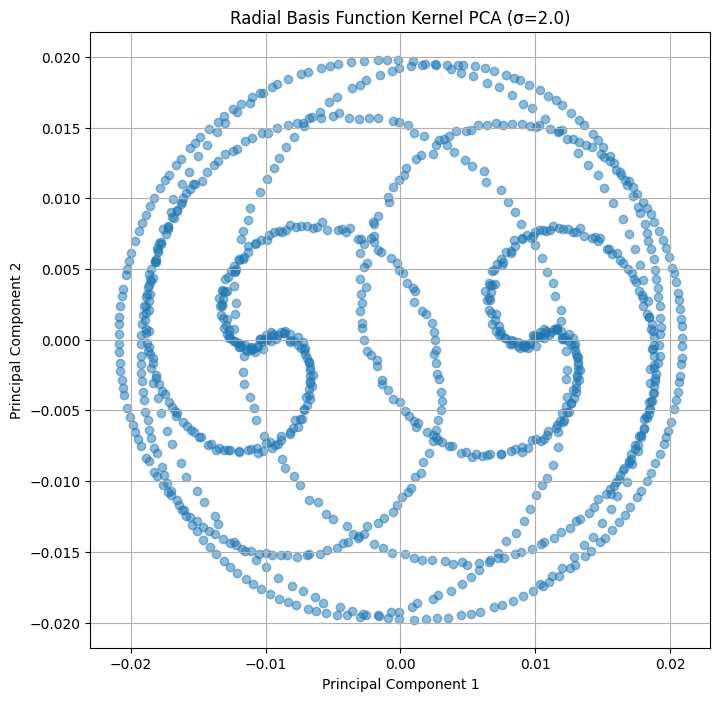

67.2520074494612% of variance is explained by the first 2 principal components.


In [43]:
sigma = 2.0

kernel_matrix = np.zeros((data.shape[0], data.shape[0]))
for i in range(data.shape[0]):
    for j in range(i, data.shape[0]):
        dist = np.sum((data[i] - data[j])**2)
        kernel_matrix[i, j] = np.exp(-dist/(2*sigma**2))
        kernel_matrix[j, i] = kernel_matrix[i, j]
centered_kernel_matrix = kernel_matrix - np.mean(kernel_matrix, axis=0) - np.mean(kernel_matrix, axis=1)[:, np.newaxis] + np.mean(kernel_matrix)
# Calculate eigenvalues and eigenvectors
eigen_values, eigen_vectors = np.linalg.eigh(centered_kernel_matrix)

eigen_values[eigen_values<1e-12]=0

alpha_1 = eigen_vectors[:,-1]/np.sqrt(data.shape[0]*eigen_values[-1])
alpha_2 = eigen_vectors[:,-2]/np.sqrt(data.shape[0]*eigen_values[-2])
x = np.dot(centered_kernel_matrix, alpha_1)
y = np.dot(centered_kernel_matrix, alpha_2)
plt.figure(figsize=(8, 8))
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'Radial Basis Function Kernel PCA (σ={sigma})')
plt.grid(True)
plt.show()
print(np.sum(eigen_values[-2:])/np.sum(eigen_values)*100, "% of variance is explained by the first 2 principal components.", sep='')

### sigma = 4

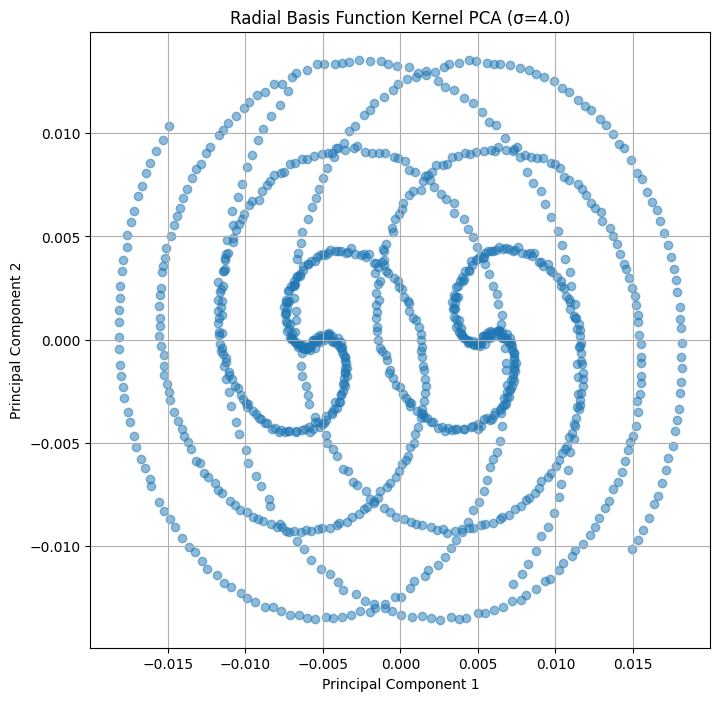

88.2455047396394% of variance is explained by the first 2 principal components.


In [44]:
sigma = 4.0

kernel_matrix = np.zeros((data.shape[0], data.shape[0]))
for i in range(data.shape[0]):
    for j in range(i, data.shape[0]):
        dist = np.sum((data[i] - data[j])**2)
        kernel_matrix[i, j] = np.exp(-dist/(2*sigma**2))
        kernel_matrix[j, i] = kernel_matrix[i, j]
centered_kernel_matrix = kernel_matrix - np.mean(kernel_matrix, axis=0) - np.mean(kernel_matrix, axis=1)[:, np.newaxis] + np.mean(kernel_matrix)
# Calculate eigenvalues and eigenvectors
eigen_values, eigen_vectors = np.linalg.eigh(centered_kernel_matrix)

eigen_values[eigen_values<1e-12]=0

alpha_1 = eigen_vectors[:,-1]/np.sqrt(data.shape[0]*eigen_values[-1])
alpha_2 = eigen_vectors[:,-2]/np.sqrt(data.shape[0]*eigen_values[-2])
x = np.dot(centered_kernel_matrix, alpha_1)
y = np.dot(centered_kernel_matrix, alpha_2)
plt.figure(figsize=(8, 8))
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'Radial Basis Function Kernel PCA (σ={sigma})')
plt.grid(True)
plt.show()
print(np.sum(eigen_values[-2:])/np.sum(eigen_values)*100, "% of variance is explained by the first 2 principal components.", sep='')

### sigma = 10

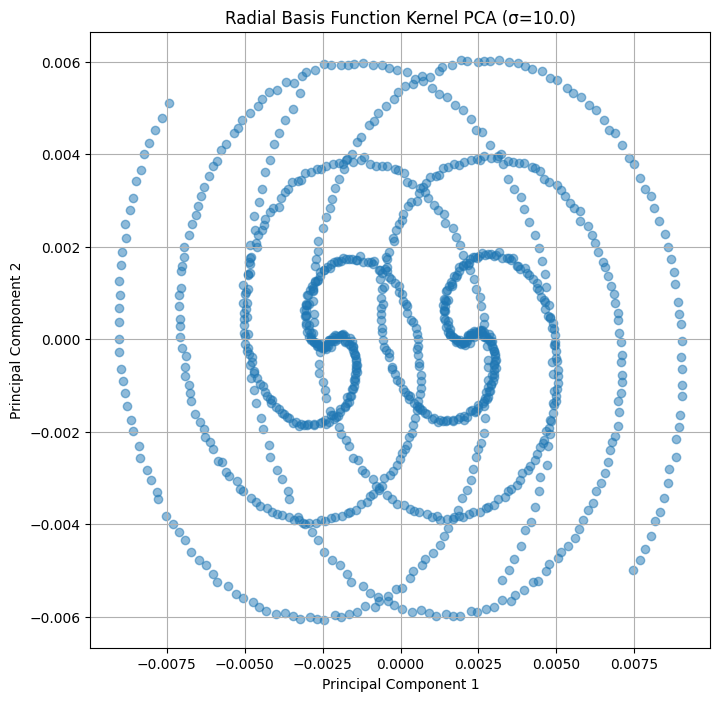

97.85337619281553% of variance is explained by the first 2 principal components.


In [45]:
sigma = 10.0

kernel_matrix = np.zeros((data.shape[0], data.shape[0]))
for i in range(data.shape[0]):
    for j in range(i, data.shape[0]):
        dist = np.sum((data[i] - data[j])**2)
        kernel_matrix[i, j] = np.exp(-dist/(2*sigma**2))
        kernel_matrix[j, i] = kernel_matrix[i, j]
centered_kernel_matrix = kernel_matrix - np.mean(kernel_matrix, axis=0) - np.mean(kernel_matrix, axis=1)[:, np.newaxis] + np.mean(kernel_matrix)
# Calculate eigenvalues and eigenvectors
eigen_values, eigen_vectors = np.linalg.eigh(centered_kernel_matrix)

eigen_values[eigen_values<1e-12]=0

alpha_1 = eigen_vectors[:,-1]/np.sqrt(data.shape[0]*eigen_values[-1])
alpha_2 = eigen_vectors[:,-2]/np.sqrt(data.shape[0]*eigen_values[-2])
x = np.dot(centered_kernel_matrix, alpha_1)
y = np.dot(centered_kernel_matrix, alpha_2)
plt.figure(figsize=(8, 8))
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'Radial Basis Function Kernel PCA (σ={sigma})')
plt.grid(True)
plt.show()
print(np.sum(eigen_values[-2:])/np.sum(eigen_values)*100, "% of variance is explained by the first 2 principal components.", sep='')

# Part C

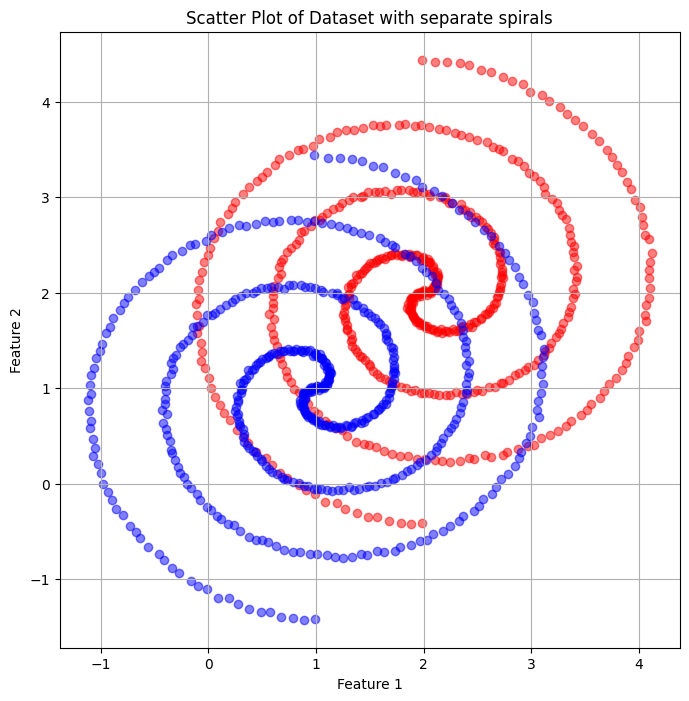

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(data[:500, 0], data[:500, 1], alpha=0.5, c='r')
plt.scatter(data[500:, 0], data[500:, 1], alpha=0.5, c='b')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Dataset with separate spirals')
plt.grid(True)
plt.show()

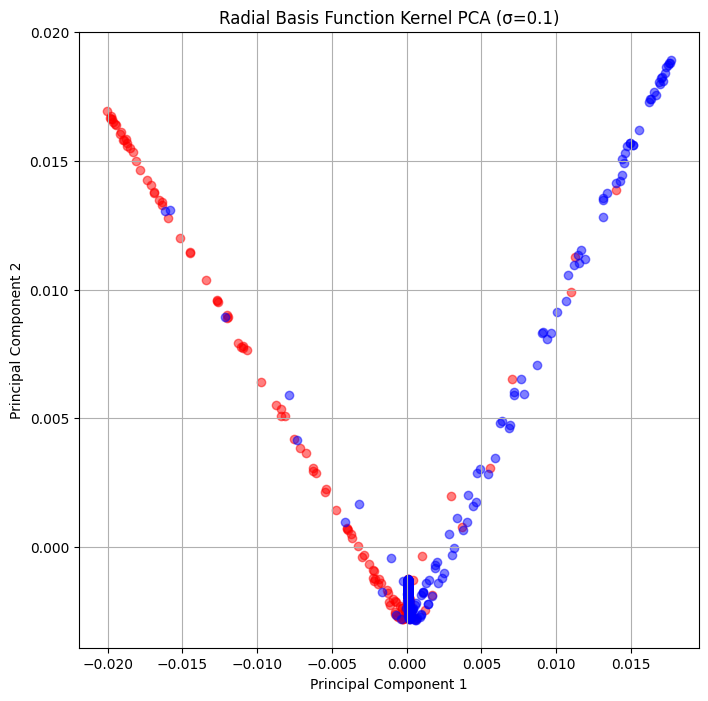

Accuracy: 58.3%


In [47]:
sigma = 0.1

kernel_matrix = np.zeros((data.shape[0], data.shape[0]))
for i in range(data.shape[0]):
    for j in range(i, data.shape[0]):
        dist = np.sum((data[i] - data[j])**2)
        kernel_matrix[i, j] = np.exp(-dist/(2*sigma**2))
        kernel_matrix[j, i] = kernel_matrix[i, j]
centered_kernel_matrix = kernel_matrix - np.mean(kernel_matrix, axis=0) - np.mean(kernel_matrix, axis=1)[:, np.newaxis] + np.mean(kernel_matrix)
# Calculate eigenvalues and eigenvectors
eigen_values, eigen_vectors = np.linalg.eigh(centered_kernel_matrix)


eigen_values[eigen_values<1e-12]=0

alpha_1 = eigen_vectors[:,-1]/np.sqrt(data.shape[0]*eigen_values[-1])
alpha_2 = eigen_vectors[:,-2]/np.sqrt(data.shape[0]*eigen_values[-2])
x = np.dot(centered_kernel_matrix, alpha_1)
y = np.dot(centered_kernel_matrix, alpha_2)
plt.figure(figsize=(8, 8))
plt.scatter(x[:500], y[:500], alpha=0.5, c='r')
plt.scatter(x[500:], y[500:], alpha=0.5, c='b')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'Radial Basis Function Kernel PCA (σ={sigma})')
plt.grid(True)
plt.show()
# print(np.sum(eigen_values[-2:])/np.sum(eigen_values)*100, "% of variance is explained by the first 2 principal components.", sep='')
acc = max((np.sum(x[:500]>0)+np.sum(x[500:]<0))/10, 100-(np.sum(x[:500]>0)+np.sum(x[500:]<0))/10)
print("Accuracy: ",acc,"%", sep='')

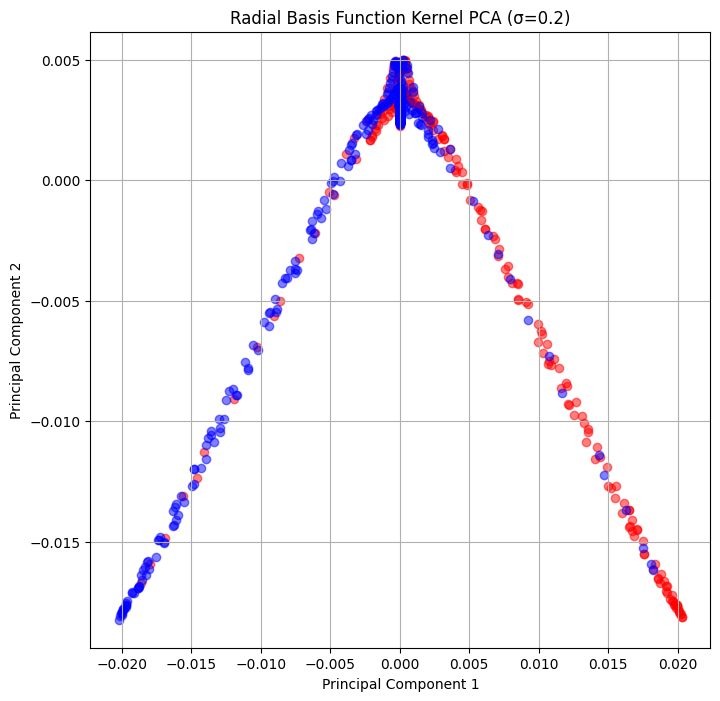

Accuracy: 63.0%


In [48]:
sigma = 0.2

kernel_matrix = np.zeros((data.shape[0], data.shape[0]))
for i in range(data.shape[0]):
    for j in range(i, data.shape[0]):
        dist = np.sum((data[i] - data[j])**2)
        kernel_matrix[i, j] = np.exp(-dist/(2*sigma**2))
        kernel_matrix[j, i] = kernel_matrix[i, j]
centered_kernel_matrix = kernel_matrix - np.mean(kernel_matrix, axis=0) - np.mean(kernel_matrix, axis=1)[:, np.newaxis] + np.mean(kernel_matrix)
# Calculate eigenvalues and eigenvectors
eigen_values, eigen_vectors = np.linalg.eigh(centered_kernel_matrix)


eigen_values[eigen_values<1e-12]=0

alpha_1 = eigen_vectors[:,-1]/np.sqrt(data.shape[0]*eigen_values[-1])
alpha_2 = eigen_vectors[:,-2]/np.sqrt(data.shape[0]*eigen_values[-2])
x = np.dot(centered_kernel_matrix, alpha_1)
y = np.dot(centered_kernel_matrix, alpha_2)
plt.figure(figsize=(8, 8))
plt.scatter(x[:500], y[:500], alpha=0.5, c='r')
plt.scatter(x[500:], y[500:], alpha=0.5, c='b')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'Radial Basis Function Kernel PCA (σ={sigma})')
plt.grid(True)
plt.show()
# print(np.sum(eigen_values[-2:])/np.sum(eigen_values)*100, "% of variance is explained by the first 2 principal components.", sep='')
acc = max((np.sum(x[:500]>0)+np.sum(x[500:]<0))/10, 100-(np.sum(x[:500]>0)+np.sum(x[500:]<0))/10)
print("Accuracy: ",acc,"%", sep='')

In [49]:
for sigma in [0.001, 0.0025, 0.005, 0.01, 0.025, 0.05, 0.1, 0.2, 0.5, 1, 2, 4, 5, 10]:

    kernel_matrix = np.zeros((data.shape[0], data.shape[0]))
    for i in range(data.shape[0]):
        for j in range(i, data.shape[0]):
            dist = np.sum((data[i] - data[j])**2)
            kernel_matrix[i, j] = np.exp(-dist/(2*sigma**2))
            kernel_matrix[j, i] = kernel_matrix[i, j]
    centered_kernel_matrix = kernel_matrix - np.mean(kernel_matrix, axis=0) - np.mean(kernel_matrix, axis=1)[:, np.newaxis] + np.mean(kernel_matrix)
    # Calculate eigenvalues and eigenvectors
    eigen_values, eigen_vectors = np.linalg.eigh(centered_kernel_matrix)


    eigen_values[eigen_values<1e-12]=0

    alpha_1 = eigen_vectors[:,-1]/np.sqrt(data.shape[0]*eigen_values[-1])
    alpha_2 = eigen_vectors[:,-2]/np.sqrt(data.shape[0]*eigen_values[-2])
    x = np.dot(centered_kernel_matrix, alpha_1)
    y = np.dot(centered_kernel_matrix, alpha_2)

    acc = max((np.sum(x[:500]>0)+np.sum(x[500:]<0))/10, 100-(np.sum(x[:500]>0)+np.sum(x[500:]<0))/10)
    print("Sigma: ", sigma, " Accuracy: ",acc,"%", sep='')

Sigma: 0.001 Accuracy: 50.2%
Sigma: 0.0025 Accuracy: 50.2%
Sigma: 0.0025 Accuracy: 50.2%
Sigma: 0.005 Accuracy: 50.8%
Sigma: 0.005 Accuracy: 50.8%
Sigma: 0.01 Accuracy: 52.6%
Sigma: 0.01 Accuracy: 52.6%
Sigma: 0.025 Accuracy: 54.1%
Sigma: 0.025 Accuracy: 54.1%
Sigma: 0.05 Accuracy: 55.3%
Sigma: 0.05 Accuracy: 55.3%
Sigma: 0.1 Accuracy: 58.3%
Sigma: 0.1 Accuracy: 58.3%
Sigma: 0.2 Accuracy: 63.0%
Sigma: 0.2 Accuracy: 63.0%
Sigma: 0.5 Accuracy: 75.3%
Sigma: 0.5 Accuracy: 75.3%
Sigma: 1 Accuracy: 75.2%
Sigma: 1 Accuracy: 75.2%
Sigma: 2 Accuracy: 75.2%
Sigma: 2 Accuracy: 75.2%
Sigma: 4 Accuracy: 75.2%
Sigma: 4 Accuracy: 75.2%
Sigma: 5 Accuracy: 75.2%
Sigma: 5 Accuracy: 75.2%
Sigma: 10 Accuracy: 75.2%
Sigma: 10 Accuracy: 75.2%


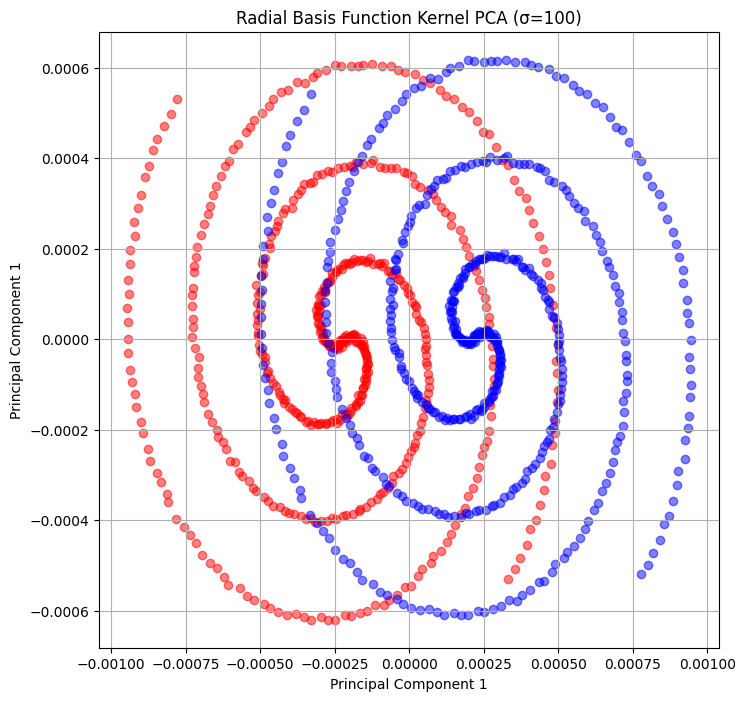

Accuracy: 75.2%


In [50]:
sigma = 100

kernel_matrix = np.zeros((data.shape[0], data.shape[0]))
for i in range(data.shape[0]):
    for j in range(i, data.shape[0]):
        dist = np.sum((data[i] - data[j])**2)
        kernel_matrix[i, j] = np.exp(-dist/(2*sigma**2))
        kernel_matrix[j, i] = kernel_matrix[i, j]
centered_kernel_matrix = kernel_matrix - np.mean(kernel_matrix, axis=0) - np.mean(kernel_matrix, axis=1)[:, np.newaxis] + np.mean(kernel_matrix)
# Calculate eigenvalues and eigenvectors
eigen_values, eigen_vectors = np.linalg.eigh(centered_kernel_matrix)


eigen_values[eigen_values<1e-12]=0

alpha_1 = eigen_vectors[:,-1]/np.sqrt(data.shape[0]*eigen_values[-1])
alpha_2 = eigen_vectors[:,-2]/np.sqrt(data.shape[0]*eigen_values[-2])
x = np.dot(centered_kernel_matrix, alpha_1)
y = np.dot(centered_kernel_matrix, alpha_2)
plt.figure(figsize=(8, 8))
plt.scatter(x[:500], y[:500], alpha=0.5, c='r')
plt.scatter(x[500:], y[500:], alpha=0.5, c='b')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 1')
plt.title(f'Radial Basis Function Kernel PCA (σ={sigma})')
plt.grid(True)
plt.show()
# print(np.sum(eigen_values[-2:])/np.sum(eigen_values)*100, "% of variance is explained by the first 2 principal components.", sep='')
acc = (np.sum(x[:500]<0)+np.sum(x[500:]>0))/10
print("Accuracy: ",acc,"%", sep='')

## SVM

In [51]:
labels = np.array([0]*500 + [1]*500)

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
sigmas = [0.001, 0.0025, 0.005, 0.01, 0.025, 0.05, 0.1, 0.2, 0.5, 1, 2, 4, 5, 10]
gammas = [1/(2*(sigma**2)) for sigma in sigmas]

param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': gammas}

# Create the SVM model
svm_model = SVC(kernel='rbf')

# Set up the grid search with cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your data
grid_search.fit(data, labels)

# Get the best parameters
best_gamma = grid_search.best_params_['gamma']
best_C = grid_search.best_params_['C']

In [53]:
print(best_gamma, best_C)
print("Best σ:", np.sqrt(1/(best_gamma*2)))

49.99999999999999 10
Best σ: 0.1


In [54]:
from sklearn.metrics import accuracy_score

pred = grid_search.best_estimator_.predict(data)

accuracy_score(pred, labels)

0.963